In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !pip install pyreadstat
# !pip install --upgrade pandas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np


<AxesSubplot:>

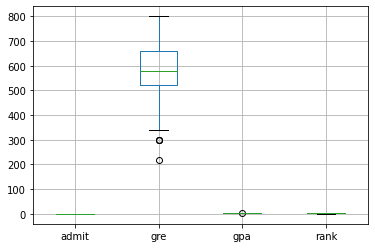

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/admission.csv')
df.head()
df.boxplot()

In [ ]:
# df.info()
df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [ ]:
train = df.drop('admit',axis=1).values
target = df['admit'].values

In [ ]:
train

array([[380.  ,   3.61,   3.  ],
       [660.  ,   3.67,   3.  ],
       [800.  ,   4.  ,   1.  ],
       ...,
       [460.  ,   2.63,   2.  ],
       [700.  ,   3.65,   2.  ],
       [600.  ,   3.89,   3.  ]])

In [ ]:
target

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### columns을 제거 안하면 'A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().y = column_or_1d(y, warn=True)'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 예측 성능
model.score(X_train, y_train)

0.7

In [ ]:
# 예측
pred_val = [[800,4,2]]
print(model.predict(pred_val))
model.predict_proba(pred_val)

[1]


array([[0.36481617, 0.63518383]])

<AxesSubplot:>

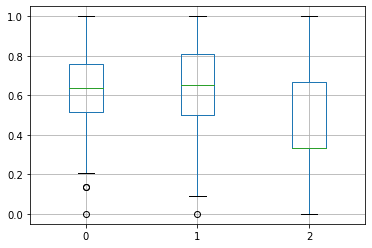

In [ ]:
# 정규화 - 0과 1사이에 데이터 분포
from sklearn.preprocessing import MinMaxScaler
scal_mx = MinMaxScaler()
train_sc_mx = scal_mx.fit_transform(train)
X_train = scal_mx.fit_transform(X_train)
X_test = scal_mx.fit_transform(X_test)
pd.DataFrame(X_train).boxplot()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_sc_mx, target, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.7178571428571429

# rank를 빼고 다시 예측

In [ ]:
train2 = df.drop(['admit','rank'],axis=1).values
target = df['admit'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train2, target, test_size=0.3)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.7035714285714286

In [ ]:
# 이상치 제거
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=df, column='gre', weight=1.5)
df1=df.drop(outlier_idx, axis=0)#, inplace=True)

In [ ]:
df

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [ ]:
df1

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
